In [1]:
# Loading all required packages
# If any of it fails, do not panic. Just install it using "pip3 install <package_name>" or by using conda install package_name
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv(r'C:\Users\srira\Desktop\Ram\Data science\Udemy\Kaggle - Redefining Cancer Treatment\Data\training\training_variants')
# Loading training_text dataset. This is seperated by ||
data_text =pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Udemy\Kaggle - Redefining Cancer Treatment\Data\training\training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [3]:
data_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
data_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [6]:
data_variants.shape

(3321, 4)

In [7]:
data_variants.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

In [8]:
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   TEXT    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [10]:
data_text.describe()

,ID
count,3321.000000
mean,1660.000000
std,958.834449
min,0.000000
25%,830.000000
50%,1660.000000
75%,2490.000000
max,3320.000000


In [11]:
data_text.shape

(3321, 2)

In [12]:
data_text.columns

Index(['ID', 'TEXT'], dtype='object')

### Learnings: 
1. After data import do info, describe, shape, columns

#### Multi class classification problem

In [13]:
data_variants.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [14]:
data_variants.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

#### My solution:

Classification models with explination nature: Multiple logistic, KNN, Decision tree & Random forest.

Txt file: Clean the file remove stop words and using TFIDF we find the count of important words and somehow feed this to variants dataset

EDA: Outliers, missing & then we will impute. 

Model building: Train_test_split

### EDA

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def data_text_processing(total_text, index, col):
    
    if type(total_text) is not int:
        string = ''
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        total_text = re.sub('\s+', ' ', str(total_text))
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words:
                string += word + " "
            
    data_text[col][index] = string        

In [18]:
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        data_text_processing(row['TEXT'], index, 'TEXT')

In [19]:
data_text.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [20]:
#merging both data frames

In [21]:
result = pd.merge(data_variants,data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [22]:
type(result)

pandas.core.frame.DataFrame

In [23]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [24]:
#Imputation

In [25]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] + ' ' + result['Variation']

In [26]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


In [27]:
y_true = result['Class'].values
result['Gene'] = result['Gene'].str.replace('\s+','_')
result['Variation'] = result['Variation'].str.replace('\s+','_')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [28]:
#Train & test
X_train, X_test, Y_train, Y_test = train_test_split(result, y_true, stratify = y_true, test_size = 0.2, random_state = 42)

In [29]:
train_df, cv_df, y_train, y_cv = train_test_split(X_train, Y_train, stratify = Y_train, test_size = 0.2, random_state = 42)

In [30]:
print('Training: ',train_df.shape[0])
print('Testing: ', X_test.shape[0])
print('Validation: ', cv_df.shape[0])

Training:  2124
Testing:  665
Validation:  532


In [31]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = X_test['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()
train_class_distribution,test_class_distribution, cv_class_distribution

(1    363
 2    289
 3     57
 4    439
 5    155
 6    176
 7    609
 8     12
 9     24
 Name: Class, dtype: int64, 1    114
 2     91
 3     18
 4    137
 5     48
 6     55
 7    191
 8      4
 9      7
 Name: Class, dtype: int64, 1     91
 2     72
 3     14
 4    110
 5     39
 6     44
 7    153
 8      3
 9      6
 Name: Class, dtype: int64)

In [32]:
type(train_class_distribution)

pandas.core.series.Series

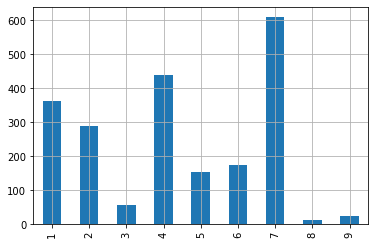

In [33]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind = 'bar')
plt.grid()
plt.show()

In [34]:
sorted_y = np.argsort(-train_class_distribution)
for i in sorted_y:
    print(i+1,':',train_class_distribution.values[i],':(',np.round((train_class_distribution.values[i]/train_df.shape[0]*100),3),'%)')

7 : 609 :( 28.672 %)
4 : 439 :( 20.669 %)
1 : 363 :( 17.09 %)
2 : 289 :( 13.606 %)
6 : 176 :( 8.286 %)
5 : 155 :( 7.298 %)
3 : 57 :( 2.684 %)
9 : 24 :( 1.13 %)
8 : 12 :( 0.565 %)


In [35]:
sorted_y = np.argsort(-test_class_distribution)
for i in sorted_y:
    print(i+1,':',test_class_distribution.values[i],':(',np.round((test_class_distribution.values[i]/X_test.shape[0]*100),3),'%)')

7 : 191 :( 28.722 %)
4 : 137 :( 20.602 %)
1 : 114 :( 17.143 %)
2 : 91 :( 13.684 %)
6 : 55 :( 8.271 %)
5 : 48 :( 7.218 %)
3 : 18 :( 2.707 %)
9 : 7 :( 1.053 %)
8 : 4 :( 0.602 %)


In [36]:
sorted_y = np.argsort(-cv_class_distribution)
for i in sorted_y:
    print(i+1,':',cv_class_distribution.values[i],':(',np.round((cv_class_distribution.values[i]/X_test.shape[0]*100),3),'%)')

7 : 153 :( 23.008 %)
4 : 110 :( 16.541 %)
1 : 91 :( 13.684 %)
2 : 72 :( 10.827 %)
6 : 44 :( 6.617 %)
5 : 39 :( 5.865 %)
3 : 14 :( 2.105 %)
9 : 6 :( 0.902 %)
8 : 3 :( 0.451 %)


#### Buidling worst model for comparision

In [40]:
test_data_len = X_test.shape[0]
cv_df_len = cv_df.shape[0]

In [54]:
cv_predicted_y = np.zeros((cv_df_len,9))
for i in range (cv_df_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

Log loss on Cross Validation Data using Random Model 2.3561707097325026


In [60]:
test_predicated_y = np.zeros((test_data_len,9))
for i in range (test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicated_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test,test_predicated_y, eps=1e-15))

Log loss on Test Data using Random Model 2.4946053588865036


In [63]:
predicted_y = np.argmax(test_predicated_y,axis=1)
predicted_y

array([2, 8, 6, 3, 1, 5, 2, 1, 5, 4, 5, 0, 2, 3, 8, 6, 0, 8, 3, 3, 2, 7,
       1, 4, 6, 8, 7, 1, 2, 6, 8, 4, 5, 3, 3, 0, 1, 3, 3, 1, 1, 3, 3, 1,
       1, 8, 4, 7, 3, 5, 1, 0, 7, 5, 1, 4, 5, 1, 0, 2, 1, 0, 7, 6, 8, 5,
       3, 0, 6, 3, 7, 6, 0, 4, 8, 2, 3, 0, 5, 8, 5, 5, 6, 4, 5, 0, 5, 8,
       4, 8, 4, 4, 8, 3, 2, 2, 4, 6, 1, 5, 5, 8, 8, 5, 0, 0, 1, 0, 7, 6,
       7, 4, 7, 5, 0, 2, 0, 1, 5, 0, 0, 4, 1, 3, 4, 6, 1, 1, 5, 2, 5, 7,
       0, 0, 7, 3, 2, 8, 2, 6, 5, 5, 0, 5, 0, 2, 1, 2, 4, 4, 3, 2, 0, 4,
       7, 0, 4, 0, 5, 2, 3, 6, 0, 8, 6, 2, 1, 3, 3, 5, 7, 8, 3, 0, 6, 4,
       7, 7, 0, 8, 8, 1, 8, 2, 5, 0, 0, 6, 0, 0, 3, 0, 7, 8, 8, 4, 1, 7,
       5, 0, 6, 1, 6, 7, 4, 3, 1, 3, 7, 3, 8, 0, 3, 3, 4, 5, 6, 8, 0, 4,
       0, 7, 0, 1, 6, 1, 4, 4, 4, 6, 7, 5, 5, 3, 1, 8, 2, 3, 0, 3, 5, 0,
       6, 5, 4, 2, 0, 3, 5, 7, 2, 4, 1, 2, 5, 2, 1, 1, 1, 5, 2, 3, 2, 7,
       6, 6, 5, 6, 5, 4, 0, 1, 4, 1, 6, 5, 8, 2, 4, 3, 1, 0, 8, 5, 7, 2,
       8, 3, 0, 3, 7, 6, 2, 1, 2, 3, 3, 8, 2, 4, 0,

In [64]:
predicted_y = predicted_y + 1